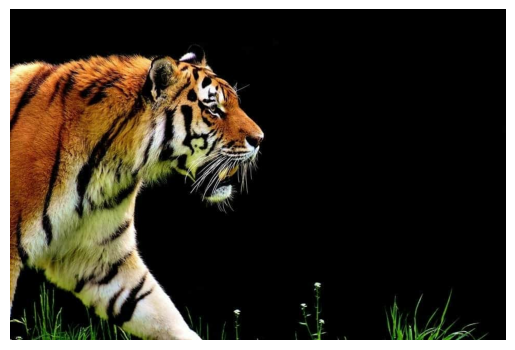

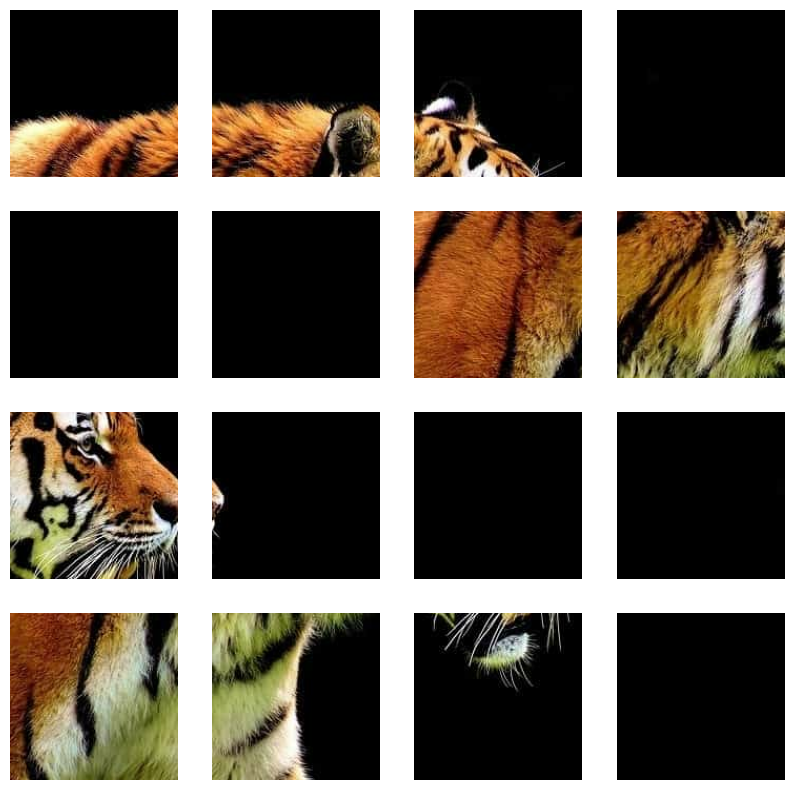

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

def split_image_into_tiles(image, tile_size):
    patches = tf.image.extract_patches(
        images=image,
        sizes=[1, tile_size, tile_size, 1],
        strides=[1, tile_size, tile_size, 1],
        rates=[1, 1, 1, 1],
        padding='VALID'
    )

    num_tiles = patches.shape[1] * patches.shape[2]
    tiles = tf.reshape(patches, [-1, num_tiles, tile_size, tile_size, image.shape[-1]])

    return tiles

# Load the image using TensorFlow
image_path = 'input_image.jpg'  # Replace with the path to your image
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image)
image = tf.expand_dims(image, axis=0)  # Add batch dimension

# Display the original image
plt.imshow(image[0])
plt.axis('off')
plt.show()

# Split the image into tiles
tile_size = image.shape[1] // 4  # Assuming square input image, dividing into a 4x4 grid
tiles = split_image_into_tiles(image, tile_size)

# Display the tiles in a grid
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i in range(rows):
    for j in range(cols):
        tile = tiles[0, i * cols + j]
        axes[i, j].imshow(tile)
        axes[i, j].axis('off')

plt.show()
